In [1]:
#import modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#read
data=pd.read_csv('advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
#pre-process
data.dropna(inplace=True)
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [5]:
#split data
x_train, x_test, y_train, y_test=train_test_split(data.drop(['Sales'],axis=1), data['Sales'],test_size=0.2)
mlr = LinearRegression()
mlr.fit(x_train ,y_train)

LinearRegression()

In [7]:
print("Coefficient ={}, Intercept={}".format(mlr.coef_, mlr.intercept_))
print("Linear regression line is Y= {:.5} + {:.5}*TV +{:5}*Radio +{:.5}*Newspaper".format(mlr.intercept_,mlr.coef_[0],mlr.coef_[1],mlr.coef_[2]))


Coefficient =[0.05439648 0.11156545 0.00084131], Intercept=4.45917043788922
Linear regression line is Y= 4.4592 + 0.054396*TV +0.11156545320377423*Radio +0.00084131*Newspaper


In [10]:
y_pred=mlr.predict(x_test)
rmse= np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score= mlr.score(data.drop(['Sales'],axis=1), data['Sales'])
print("RMSE = {}, MSE= {}, MAE = {}, score={}".format(rmse, mse,mae,score))

RMSE = 1.6560603369753057, MSE= 2.742535839702763, MAE = 1.3507289219557186, score=0.9023084833551347


In [18]:
def train2features(f1,f2):
    print("taking two features : " +f1+" & " + f2)
    x_train, x_test, y_train, y_test=train_test_split(data[[f1,f2]], data['Sales'],test_size=0.25)
    mlr = LinearRegression()
    mlr.fit(x_train ,y_train)
     
    print("Coefficient ={}, Intercept={}".format(mlr.coef_, mlr.intercept_))
    print("Linear regression line is Y= {:.5} + {:.5}*{} +{:5}*{} ".format(mlr.intercept_,mlr.coef_[0],f1,mlr.coef_[1],f2))
     
    pred=mlr.predict(x_test)
    rmse= np.sqrt(mean_squared_error(y_test,pred))
    mse = mean_squared_error(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    print("RMSE = {}, MSE= {}, MAE = {}".format(rmse, mse,mae))


In [19]:
train2features('TV','Radio')
train2features('TV','Newspaper')
train2features('Radio','Newspaper')

taking two features : TV & Radio
Coefficient =[0.05486058 0.10455397], Intercept=4.638828774433248
Linear regression line is Y= 4.6388 + 0.054861*TV +0.10455397498009733*Radio 
RMSE = 1.285165896783759, MSE= 1.651651382256003, MAE = 0.9826604038736663
taking two features : TV & Newspaper
Coefficient =[0.05535708 0.02973006], Intercept=6.056041926099411
Linear regression line is Y= 6.056 + 0.055357*TV +0.02973005892443558*Newspaper 
RMSE = 2.1300846017801804, MSE= 4.5372604107410295, MAE = 1.6575045947628164
taking two features : Radio & Newspaper
Coefficient =[0.11744237 0.02098574], Intercept=11.922976805328405
Linear regression line is Y= 11.923 + 0.11744*Radio +0.020985739132993026*Newspaper 
RMSE = 5.1245530952743215, MSE= 26.26104442628563, MAE = 4.328104328143666


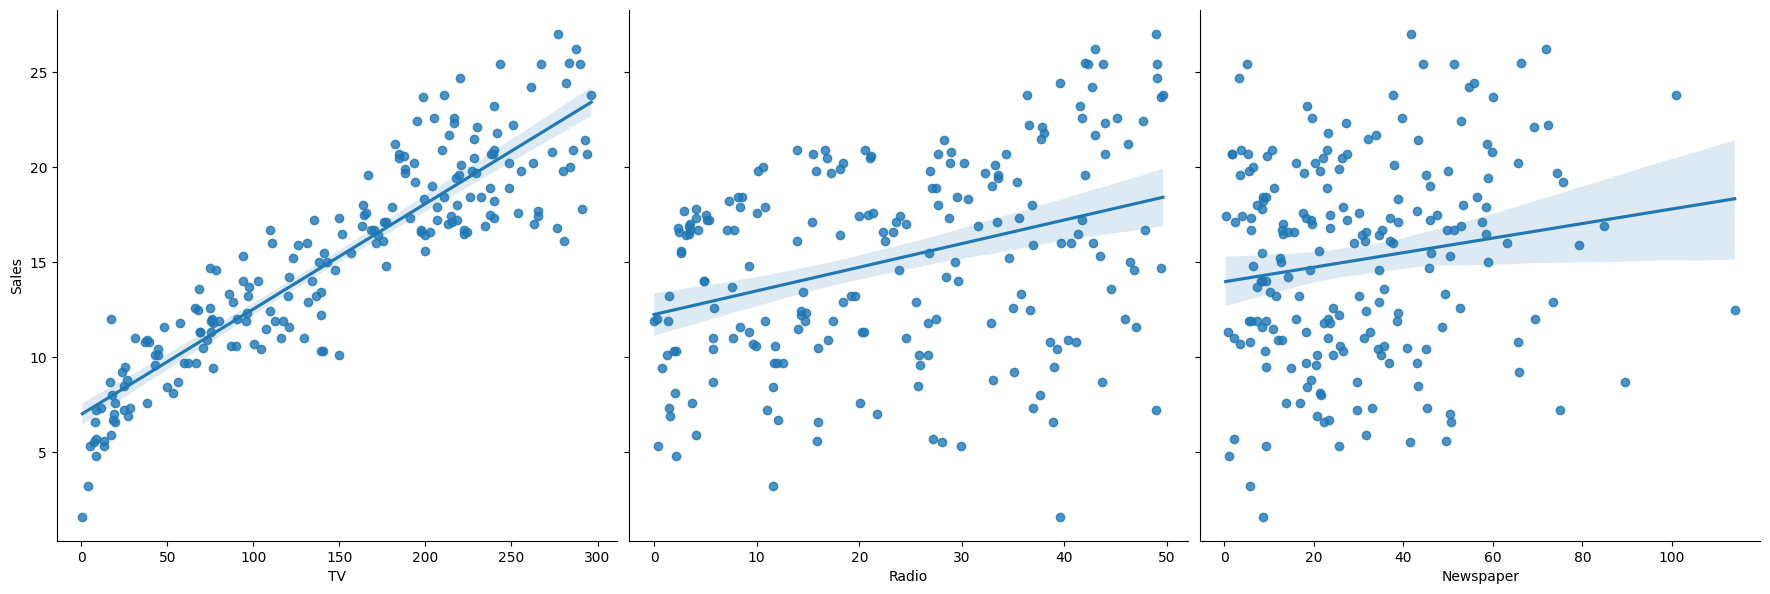

In [21]:
sns.pairplot(data,x_vars=['TV','Radio','Newspaper'], y_vars=['Sales'], kind='reg', height=6, aspect=1)